# Bank Customer's Churn Classification¶

Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Imran\\Desktop\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring the Data set

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Import essential library with visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplo

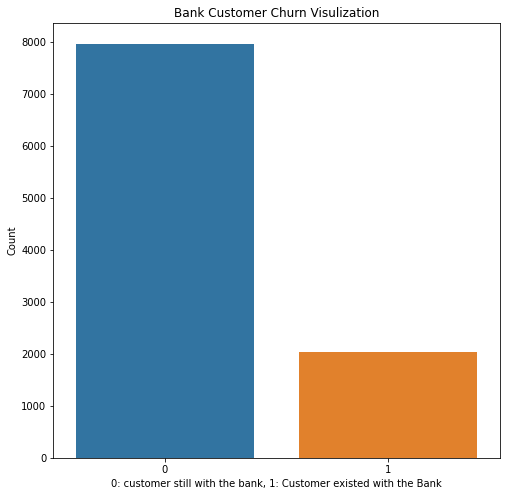

In [11]:
#visulization of countplot of Existed customer to the data set
plt.figure(figsize=(8,8))
sns.countplot(x='Exited',data=df)
plt.xlabel("0: customer still with the bank, 1: Customer existed with the Bank")
plt.ylabel("Count")
plt.title("Bank Customer Churn Visulization")
plt.show()

In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Feature Engineering
converting categorical feature into numeric feature using get_dummies()

In [15]:
#Converting 'Geography' and 'Gender' Column
geography = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [16]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [17]:
df.drop(['Geography', 'Gender'],axis=1,inplace=True)

# Data Preprocessing

• Split the dataset into independent features (ie: X) and label (ie: y).

• Split the dataset further into train and test sets.

• Apply feature scaling to train and test sets of independent features

In [18]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [19]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("X_train size {}, X_test size {}".format(X_train.shape,x_test.shape))

X_train size (7000, 11), X_test size (3000, 11)


In [20]:
#feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

# Building Artifisal Neural Network (ANN)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [22]:
#Initialising the ANN
classifier = Sequential()

In [23]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [24]:
#Adding the secound hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [25]:
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [26]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
#Fitting the ANN to the Training set
model_history = classifier.fit(X_train, Y_train, batch_size=10, validation_split=0.33, epochs=100)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 9s 2ms/step - loss: 0.5429 - accuracy: 0.7931 - val_loss: 0.4915 - val_accuracy: 0.7979
Epoch 2/100
4689/4689 [==============================] - 4s 931us/step - loss: 0.4726 - accuracy: 0.8025 - val_loss: 0.4558 - val_accuracy: 0.8031
Epoch 3/100
4689/4689 [==============================] - 4s 907us/step - loss: 0.4412 - accuracy: 0.8140 - val_loss: 0.4378 - val_accuracy: 0.8161
Epoch 4/100
4689/4689 [==============================] - 4s 882us/step - loss: 0.4243 - accuracy: 0.8224 - val_loss: 0.4321 - val_accuracy: 0.8200
Epoch 5/100
4689/4689 [==============================] - 4s 914us/step - loss: 0.4158 - accuracy: 0.8273 - val_loss: 0.4286 - val_accuracy: 0.8235
Epoch 6/100
4689/4689 [==============================] - 4s 903us/step - loss: 0.4096 - accuracy: 0.8290 - val_loss: 0.4253 - val_accuracy: 0.8209
Epoch 7/100
4689/4689 [==============================] - 4s 907us/step -

In [28]:
#List all data in history
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

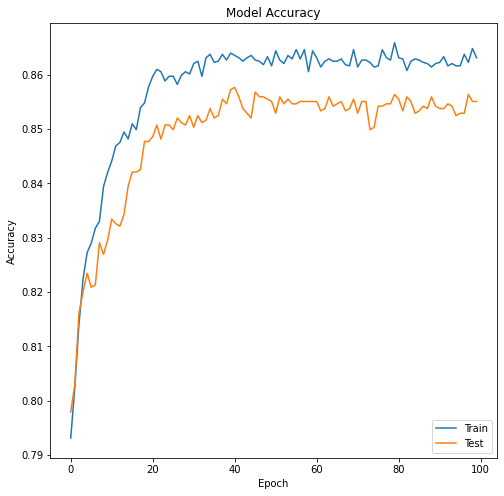

In [29]:
#Summrize history of accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

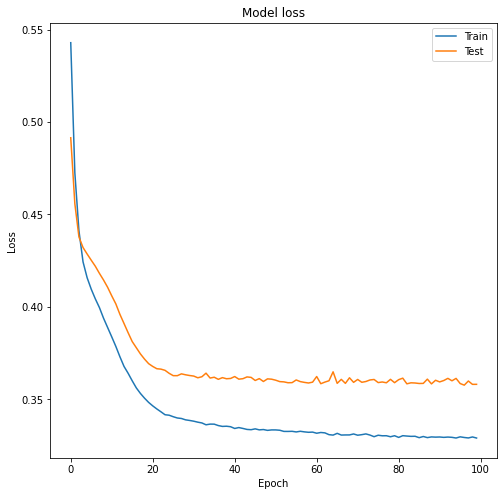

In [30]:
#Summarize history of accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

# Model Evalution

In [31]:
#Predicting the test results 
y_pred = classifier.predict(x_test)

In [32]:
y_pred

array([[0.2273638 ],
       [0.31136465],
       [0.18056244],
       ...,
       [0.15667757],
       [0.04622328],
       [0.52225083]], dtype=float32)

In [33]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [34]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[2278,  101],
       [ 317,  304]], dtype=int64)

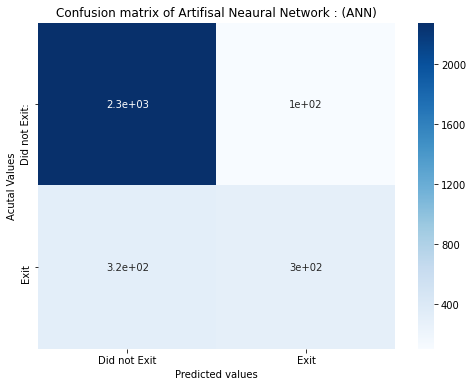

In [35]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['Did not Exit','Exit'],yticklabels=['Did not Exit: ','Exit'])
plt.xlabel('Predicted values')
plt.ylabel("Acutal Values")
plt.title("Confusion matrix of Artifisal Neaural Network : (ANN)")
plt.show()

In [36]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print("The accuracy of ANN Model is {}%".format(score*100))

The accuracy of ANN Model is 86.06666666666666%


# Predictions 

In [37]:
def predict_exit(sample_value):
    #convert list to numpy array
    sample_value = np.array(sample_value)
    #Reshape because sample_value contanious only 1 record
    sample_value = sample_value.reshape(1,-1)
    #Feature Scalling
    sample_value = scaler.transform(sample_value)
    return classifier.predict(sample_value)

In [38]:
# Predictions
# Value order: 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [39]:
# Predictions
# Value order: 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: High change of exit!
